## Data Preprocessing for C-3BO

In [1]:
#data management imports
import os
import glob

#preprocessing/augmentation
import numpy as np
import cv2
import imutils #maybe won't use
import PIL
from PIL import Image, ImageFilter

#visualization
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#other useful libraries
import tqdm

In [1]:
pwd

'C:\\Users\\leode\\isef_2022-23'

In [2]:
dataDir = "C:\\Users\\leode\\Blood-Cancer_Data"

class Dataset:
    def __init__(self, mainDir,):
        assert os.dir.exists(dataDir) and len(os.listdir(mainDir)) > 2
        self.mainDir = mainDir
        self.curr = mainDir[0]
    def changeCurr(to): self.curr = mainDir[to]
    def information(self, sort=False):
        return ''
    #compares datasets based on criteria
    def visualize(self, how='bar'):
        pass
    def __new__(cls, *args, **kwargs):
        if cls._instance is None:
            cls._instance = cls(*args, **kwargs)
        return cls._instance
    


In [3]:
datasets = list()

#every root we will be ignoring right now
ignore = [
    "acute_myeloid_leukemia",
    "ALL_IDB2",
    "SN-AM-BALL-MM",
    "genetic_data",
    "chronic_myeloid_leukemia"
]
inIgnore = lambda path: sum([i in path for i in ignore]) > 0
nonTypes = set({'.rar', '.txt', '.xyc'})

for (root, dirs, files) in os.walk(dataDir, topdown=True):
    if inIgnore(root) or root==dataDir: continue
    if len(files)>0 and files[0][-4:] in nonTypes: continue
    datasets.append(root)
    print(root)

C:\Users\leode\Blood-Cancer_Data\ALL_IDB1\im
C:\Users\leode\Blood-Cancer_Data\ALL_Tehran
C:\Users\leode\Blood-Cancer_Data\Healthy-Cells
C:\Users\leode\Blood-Cancer_Data\Healthy-Cells\Platelets
C:\Users\leode\Blood-Cancer_Data\multiple_myeloma
C:\Users\leode\Blood-Cancer_Data\Parent
C:\Users\leode\Blood-Cancer_Data\Preprocessed


<class 'numpy.ndarray'>
________________________________________________________________________________________________________________________
<class 'numpy.ndarray'>
________________________________________________________________________________________________________________________
<class 'numpy.ndarray'>
________________________________________________________________________________________________________________________
.png is not supported
________________________________________________________________________________________________________________________
<class 'numpy.ndarray'>
________________________________________________________________________________________________________________________
<class 'numpy.ndarray'>
________________________________________________________________________________________________________________________


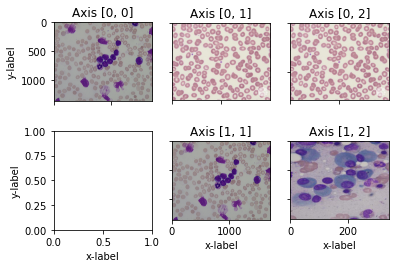

In [4]:
fig, axs = plt.subplots(2, 3)

#visualize the images
r = 0
c = 0
for D in datasets:
    images = glob.glob(f"{D}/*")
    if len(images)==0: continue
    try:
        img = mpimg.imread(images[0])
        print(type(img))
        axs[r, c].imshow(img)
        axs[r, c].set_title(f"Axis {[r, c]}")
        #imgplot = plt.imshow(img)
        #plt.show()
    except SyntaxError: print(f"{images[0][-4:]} is not supported")
    except Exception as e: print(type(e))
    finally:
        if (c==2):
            c = 0
            r += 1
        else: c += 1
        print('_'*120)
    
for ax in axs.flat: ax.set(xlabel='x-label', ylabel='y-label')
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

### each image can access a Preprocessed object to increase the diversity of the data

In [36]:
#do this with preprocessing!

class Preprocessed:
    def __init__(self, img, numVar: int):
        self.img = img.resize((270, 340))
        self.numVar = numVar #just for easy object access
        self.variations = np.ones((numVar, 270, 340, 3))
        self.used = 0 #number of techniques used so far
    def blur(self, method="Gaussian"):
        blurredImg = self.img.resize((340, 270)).filter(ImageFilter.GaussianBlur(radius=10))
        self.variations[self.used] = blurredImg
        #print("Blurred the image!")
    def rotate(self, angle):
        rotatedImg = self.img.rotate(90, PIL.Image.NEAREST, expand=1)
        self.variations[self.used] = rotatedImg
        #print("Rotated the image!")
    def flip(self, method="..."):
        flippedImg = self.img.transpose(Image.FLIP_TOP_BOTTOM)
        self.variation[self.used] = flippedImg
        #print("Flipped the image!")
    def KERNEL(self, *args, **kwargs):
        pass
    def customTransformation(self, *args, **kwargs):
        pass
    def selectByScript(self, script):
        for M in script.keys():
            for argument in script.values():
                if M==1: self.blur(argument)
                elif M==2: self.rotate(argument)
                elif M==3: self.flip(argument)
                elif M==4: self.KERNEL(*argument)
                else: customTransformation()
                self.used += 1
    #recheck this dunder method        
    #def __call__(self): self.used += 1
    def __str__(self):
        print("size of image:", self.img.size)
        print("...")
        print("number of variations for augmentation", self.variations.shape[0])
        return ""
    def __del__(self):
        #probably necessary since many objects will be made
        return

preprocessedData = list()
script = {
    1: ["Gaussian", "Gaussian"],
    2: [10, 90],
}


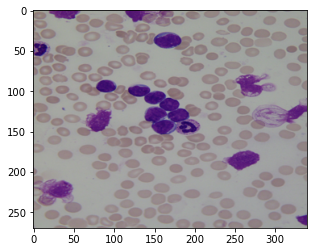

In [38]:
#example of the workings of class Preprocessed...
y = Image.open("C:\\Users\\leode\\Blood-Cancer_Data\\ALL_IDB1\\im\Im001_1.jpg")
sample1 = Preprocessed(y, 4)
sample1.selectByScript(script)

#can access the preprocessed images through the object
plt.imshow(sample1.variations[2]/255.)

In [39]:
counter = 0
counter2 = 0
try:
    for D in datasets:
        for path in tqdm.tqdm(glob.glob(f"{D}/*")):
            try:
                img = Image.open(path)  
                #img.save(f"{dataDir}\\Parent\\{counter}_cls.jpg")
                modifiedImg = Preprocessed(img, 4)
                modifiedImg.selectByScript(script)
                for idx in range(modifiedImg.numVar):
                    counter2 += 1
                    #make sure to specify the cls
                    plt.imsave(f"{dataDir}\\Preprocessed\\{counter2}_cls.jpg", modifiedImg.variations[idx]/255.)
                del(modifiedImg)
                counter += 1
            except IOError:
                pass
except KeyboardInterrupt: print("just letting you know that data augmentation has not finished")
except Exception as e: print(type(e), "is the error...")
else: print("the process is finished")
finally: print("You ended with", counter2, "preprocessed images")

100%|████████████████████████████████████████████████████████████████████████████████| 108/108 [00:27<00:00,  4.00it/s]
0it [00:00, ?it/s]
  4%|███▌                                                                            | 69/1561 [00:06<02:16, 10.97it/s]


KeyboardInterrupt: 

#### partition the data into train/val/test, where Parent and Preprocessed images are randomly placed

In [63]:
#given two folders- Parent and Principal- we want to partition into three folders

folderTrain = "C:\\Users\\leode\\Blood-Cancer_Data\\Official\\train"
folderVal = "C:\\Users\\leode\\Blood-Cancer_Data\\Official\\validation"
folderTest = "C:\\Users\\leode\\Blood-Cancer_Data\\Official\\test"

paths = list()
for P in glob.glob("C:\\Users\\leode\\Blood-Cancer_Data\\Parent/*"): paths.append(P)
for P in glob.glob("C:\\Users\\leode\\Blood-Cancer_Data\\Preprocessed/*"): paths.append(P)
    
#later shuffle using StratifiedShuffleSplit
...

idcs = np.arange(0, len(paths))
np.random.shuffle(idcs)
paths = np.array(paths)[idcs]
#shuffle in the same way with the labels

#the train/val/test proportions are 70%-20%-10%... this is arbitrarily chosen
for P in paths[0 : Idx1]:
    pass
for P in paths[Idx1 : Idx2]
    pass
for P in paths[Idx2:]:
    pass

In [93]:
Idx1 = int(paths.shape[0]*0.70)
Idx2 = Idx1 + int(paths.shape[0]*0.20)



3